# Intro for XAI ML

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.model_selection import train_test_split


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [22]:
df=pd.read_csv("../diabetes.csv")

In [23]:
df.head()
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
rng = np.random.RandomState(42)


In [26]:
train,test = train_test_split(df, test_size=0.2, random_state=42,stratify=df["Outcome"])

display(train["Outcome"].value_counts())
display(test["Outcome"].value_counts())


0    400
1    214
Name: Outcome, dtype: int64

0    100
1     54
Name: Outcome, dtype: int64

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score,KFold

cv = KFold(n_splits=10, random_state=7,shuffle=True)
scoring="accuracy"
results={}
X_train=train.iloc[:,1:-1]
y_train=train.iloc[:,-1]

X_test=test.iloc[:,1:-1]
y_test=test.iloc[:,-1]


In [28]:

# A) Linear algorithms
# Linear Discriminant Analysis
lda_model=LinearDiscriminantAnalysis()
lda_scores = cross_val_score(lda_model, X_train,y_train , cv=cv,scoring=scoring)
results["lda"]=lda_scores


In [29]:
# B) Non-Linear algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# CART
model_cart = DecisionTreeClassifier(random_state=42)
cart_scores = cross_val_score(model_cart, X_train, y_train, cv=cv,scoring=scoring)
results["cart"]=cart_scores

# kNN
model_knn = KNeighborsClassifier()
knn_scores = cross_val_score(model_knn,  X_train, y_train, cv=cv,scoring=scoring)
results["knn"]=knn_scores


In [30]:
# C) Advanced algorithms
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# SVM
model_svm = SVC(random_state=42)
svm_scores = cross_val_score(model_svm, X_train, y_train, cv=cv,scoring=scoring)
results["svm"]=svm_scores
# Random Forest
model_rf = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(model_rf, X_train,  y_train, cv=cv,scoring=scoring)
results["rf"]=rf_scores
results=pd.DataFrame.from_dict(results)
results.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lda,10.0,0.781412,0.059916,0.704918,0.729508,0.780407,0.833950,0.870968
cart,10.0,0.692094,0.039613,0.622951,0.676230,0.691036,0.705645,0.770492
knn,10.0,0.727869,0.060383,0.639344,0.684426,0.725806,0.763353,0.819672
svm,10.0,0.766843,0.047419,0.688525,0.754098,0.770492,0.786290,0.854839
rf,10.0,0.771867,0.044798,0.688525,0.754098,0.762295,0.790323,0.838710


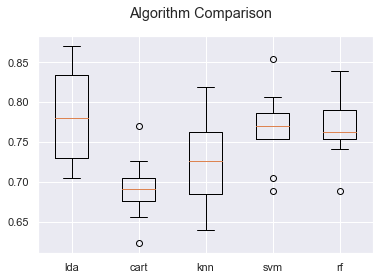

In [31]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks([1, 2, 3, 4, 5], results.columns)
plt.show();

### Predict

In [35]:
#testing a prediction with...lda
lda_model=LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
pred=lda_model.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[85, 15],
       [26, 28]])

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7337662337662337

# why did it predict like that?